# IMPLEMENTATION OF METHODS

In [1]:
# standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
%load_ext autoreload
%autoreload 2

# own functions
import proj1_helpers as P1H
import dataprocessing as DP
import methods as ME

from grad_loss import*

#constants
train_path = 'train.csv'
test_path = 'test.csv'

In [2]:
#Importing data: 
y, x, ids = load_csv_data(train_path, sub_sample=True)

ratio = 0.8

x_tr, x_te, y_tr, y_te = DP.split_data(x, y, ratio)

In [3]:
train_x = normalize(x_tr)
test_x = normalize(x_te)

### Least Squares GD

In [19]:
initial_w_GD = np.zeros((train_x.shape[1], 1))
gamma_GD = 0.2
max_iters_GD = 1500

loss_LSGD, w_LSDG = ME.least_squares_GD(y_tr, train_x, initial_w_GD, max_iters_GD, gamma_GD)

y_pred_GD = P1H.predict_labels(w_LSDG, x_te) 

accuracy_GD = DP.pred_acc(y_te, y_pred_GD)

print("Error in percentage in least squares GD with gamma", gamma_GD, "and", max_iters_GD, "iterations:", accuracy_GD[0])

Error in percentage in least squares GD with gamma 0.2 and 1500 iterations: 0.263


### Least Squares SGD

In [20]:
initial_w_SGD = np.zeros((train_x.shape[1], 1))

gamma_SGD = 0.0001
max_iters_SGD = 2000

loss_LSSGD, w_LSSDG = ME.least_squares_SGD(y_tr, train_x, initial_w_SGD,max_iters_SGD, gamma_SGD)

y_pred_SGD = P1H.predict_labels(w_LSSDG, x_te) 
accuracy_SGD = DP.pred_acc(y_te, y_pred_SGD)

print("Error in percentage in least squares SGD with gamma", gamma_SGD, "and", max_iters_SGD, "iterations:", accuracy_SGD[0])

Error in percentage in least squares SGD with gamma 0.0001 and 2000 iterations: 0.313


### Least Squares

In [21]:
loss_LS, w_LS = ME.least_squares(y_tr, train_x)

y_pred_LS = P1H.predict_labels(w_LS, x_te) 
accuracy_LS = DP.pred_acc(y_te, y_pred_LS)

print("Error in percentage in least squares:", accuracy_LS[0])

Error in percentage in least squares: 0.313


### Ridge Regression

In [7]:
lambda_RR= 2.33572146909e-05

loss_RR, w_RR = ME.ridge_regression(y_tr, train_x, lambda_RR)

y_pred_RR = P1H.predict_labels(w_RR, x_te) 

accuracy_RR = DP.pred_acc(y_te, y_pred_RR)

print("Error in percentage in ridge regression with lambda", lambda_RR, ":", accuracy_RR[0])


Error in percentage in ridge regression with lambda 2.33572146909e-05 : 0.253


In [22]:
lambdas_RR=np.logspace(-7,2,20)
accuracy_RR_all=[]
loss_RR_all=[]

for lambda_RR in lambdas_RR:
    
    loss_RR, w_RR = ME.ridge_regression(y_tr, train_x, lambda_RR)
    
    y_pred_RR = P1H.predict_labels(w_RR, x_te) 
    accuracy_RR = DP.pred_acc(y_te, y_pred_RR)
    
    accuracy_RR_all.append(accuracy_RR[0])
    loss_RR_all.append(loss_RR)

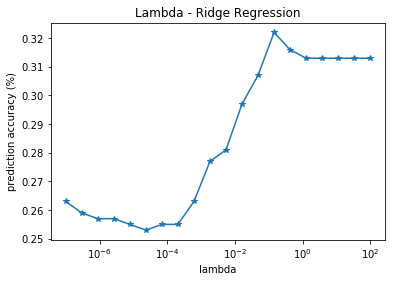

lowest value of lambda: 2.33572146909e-05


In [35]:
plt.semilogx(lambdas_RR, accuracy_RR_all,'*-',)  
plt.title('Lambda - Ridge Regression')
plt.ylabel('prediction accuracy (%)')
plt.xlabel('lambda')

plt.show()

print("lowest value of lambda:", lambdas_RR[5])

### Logistic regression

In [10]:
##Before we preform logistic regression we must add a constant (intercept) in the x, and set y to 1/0 (instead of 1/-1)
train_x_LR = np.c_[np.ones((train_x.shape[0], 1)), train_x]
test_x_LR = np.c_[np.ones((test_x.shape[0], 1)), test_x]


ty_LR = classify(y_tr)

max_iters_LR = 1000
gamma_LR = 6.5e-05

initial_w_LR = np.zeros((train_x_LR.shape[1], 1))

In [11]:
loss_LR, w_LR = ME.logistic_regression(ty_LR, train_x_LR, initial_w_LR, max_iters_LR, gamma_LR) 

y_pred_LR = DP.log_pred(test_x_LR, w_LR)

accuracy_LR = DP.pred_acc(y_te, y_pred_LR)

print("Error in percentage using Logistic regression with gamma", gamma_LR, "and", max_iters_LR, "iterations:", accuracy_LR[0])


Error in percentage using Logistic regression with gamma 6.5e-05 and 1000 iterations: 0.265


### Regular Logistic regression

In [12]:
##Before we preform Regular logistic regression we must add a constant (intercept) in the x, and set y to 1/0 (instead of 1/-1)
train_x_RLR = np.c_[np.ones((train_x.shape[0], 1)), train_x]
test_x_RLR = np.c_[np.ones((test_x.shape[0], 1)), test_x]

ty_RLR = classify(y_tr)

max_iters_RLR = 1000
gamma_RLR = 6.5e-05
lambda_RLR = 1e-02

initial_w_RLR = np.zeros((train_x_RLR.shape[1], 1))

In [13]:
loss_RLR, w_RLR = ME.reg_logistic_regression(ty_RLR, train_x_RLR, lambda_RLR, initial_w_RLR, max_iters_RLR, gamma_RLR)

y_pred_RLR = DP.log_pred(test_x_RLR, w_RLR)

accuracy_RLR = DP.pred_acc(y_te, y_pred_RLR)

print("Error in percentage in regularized logistic regression with gamma", gamma_RLR, ", lambda", lambda_RLR,
      "and", max_iters_RLR, "iterations:", accuracy_RLR[0])


Error in percentage in regularized logistic regression with gamma 6.5e-05 , lambda 0.01 and 1000 iterations: 0.265


In [38]:
#To choose the best value of lambda, several different values are plotted
lambdas_RLR=np.logspace(-2,2,20)
accuracy_RLR_all=[]
loss_RLR_all=[]

for lambda_RLR in lambdas_RLR:
    
    loss_RLR, w_RLR = ME.reg_logistic_regression(ty_RLR, train_x_RLR, lambda_RLR, initial_w_RLR, max_iters_RLR, gamma_RLR)
    
    y_pred_RLR = DP.log_pred(test_x_RLR, w_RLR)
    accuracy_RLR = DP.pred_acc(y_te, y_pred_RLR)
    
    accuracy_RLR_all.append(accuracy_RLR[0])
    loss_RLR_all.append(loss_RLR)

best_lambda_value = lambdas_RLR[accuracy_RLR_all.index(min(accuracy_RLR_all))]


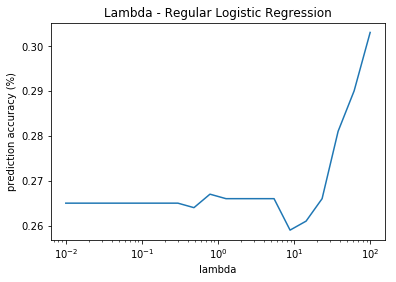

Best value of lambda: 8.8586679041


In [40]:
plt.semilogx(lambdas_RLR,accuracy_RLR_all)

plt.title('Lambda - Regular Logistic Regression')
plt.ylabel('prediction accuracy (%)')
plt.xlabel('lambda')
plt.show()

print("Best value of lambda:", best_lambda_value)